<br>
<img src="https://www.lancaster.ac.uk/media/lancaster-university/content-assets/images/fst/hero/Hero-Physics-ParticleAccelerator2.jpg" width="100%" style="margin-left:auto; margin-right:auto">



# Graph Visualization: Higgs Boson Twitter Dataset

DATA 620
Bonnie Cooper, George Cruz Deschamps, Rob Hodde

<br>

## 1) Load a graph database of your choosing.

Exploring the [Higgs Twitter Dataset](https://snap.stanford.edu/data/higgs-twitter.html) using just one of the connectivity layers described in the Nature paper, [The Anatomy of a Scientific Rumor](https://www.nature.com/articles/srep02980). We use the `higgs-reply_network.edgelist` because this is the smallest of the 4 edgelists associated with this study.

In [1]:
# import the networkx library
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import higgs_retweet_network.edgelist
cols = ["node1", "node2", "w"]
path = 'https://raw.githubusercontent.com/SmilodonCub/DATA620/master/higgs-reply_network.edgelist'
higgs_df = pd.read_csv( path, header = None, delimiter=' ' )
higgs_df.columns = cols
print( higgs_df.shape )
higgs_df.head()

(32523, 3)


,node1,node2,w
0,161345,8614,1
1,428368,11792,1
2,77904,10701,1
3,124554,286277,1
4,194873,194873,1


In [3]:
g = nx.Graph()
for index, row in higgs_df.iterrows():
    g.add_edge( row['node1'], row['node2'] )

<br>

## 2) Create a basic analysis of the graph

The analysis should include:
* the graph's diameter
* at least one other metric of choice

before we can calculate descriptive metrics about the network, we need to establish the connectivity...

In [4]:
# is the graph connected?
nx.is_connected(g )

False

this edgelist appears to contain multiple disconnected subgraphs. Let's learn more about thier sizes...

In [5]:
# OK then! will seperate into components
comps = nx.connected_components( g )
lengths = [len(c) for c in sorted(comps, key=len, reverse=True)]
print( 'There are ' + str(len( lengths )) + ' graph components' )
print( 'Here are the 5 largest:')
lengths[0:5]

There are 10641 graph components
Here are the 5 largest:


[12839, 40, 39, 38, 36]

we see that there is one major graph component and many comparatively smaller components.  
let's move forward using the largest component

In [6]:
# use the largest subgraph
largest_cc = max(nx.connected_components(g), key=len)
# create a subgraph of the largest component
g_sub = g.subgraph(largest_cc).copy()

Return some summary metrics on the graph network:

In [7]:
# show some basic summary metrics on the graph
print(nx.info(g_sub))

Graph with 12839 nodes and 14123 edges


In [8]:
# graph diameter
d = nx.diameter( g_sub )
print( "higgs_df graph diameter: ", d )

higgs_df graph diameter:  30


The distance measure tells us that the shortest distance between the most distant nodes is 30

In [9]:
# describe the graph density
density = nx.density(g_sub)
print("Network density:", density)

Network density: 0.00017136746981906772


For reference: a fully disconnected network would have a density value == 0 whereas a fully connected network would have a density value of 1.  
We see that our Higgs Boson reply network is sparsely connected.  

Would you expect the Higgs Boson retweet network to have a higher or lower connectivity density?  
(my guess is higher, but I don't use Twitter so....)

<br>

## 3) Use a visualization tool of your choice

Display the graph network with either Neo4j, Gephi, etc.

Let's start with a basic graph.

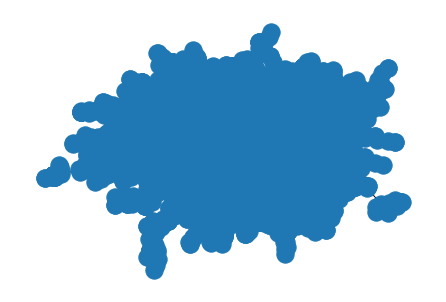

In [10]:
nx.draw(g_sub)

Expand the graph and add some color. 

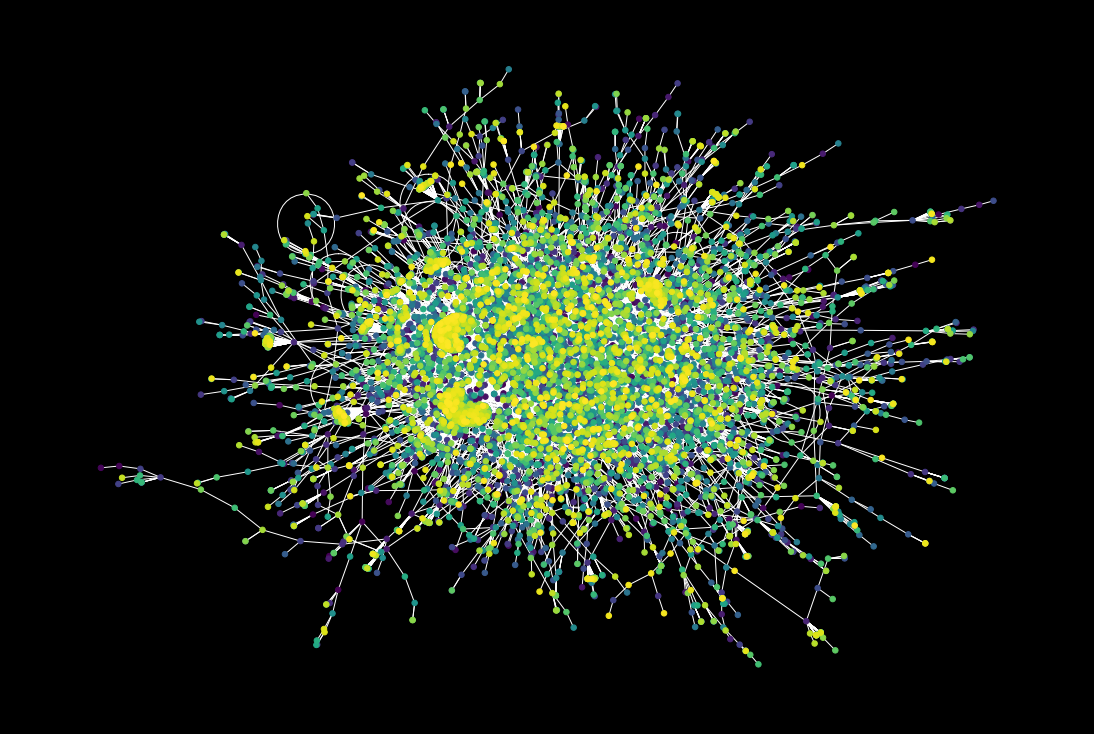

In [15]:
import numpy as np

colors = np.linspace(0,1, len(g_sub.nodes))
fig = plt.figure(figsize=(15,10))
nx.draw(g_sub,
        node_size=30,
        node_color = colors,
        edge_color="white")
fig.set_facecolor('black')

Let's take a look at a spiral layout. 

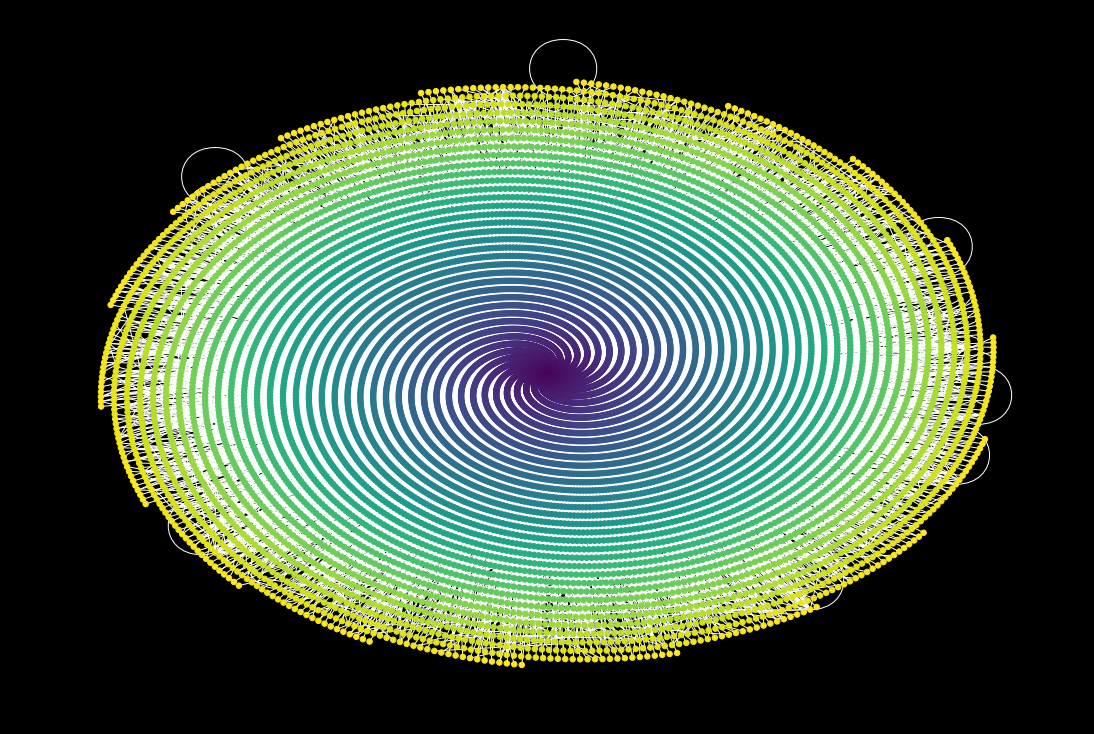

In [17]:
colors = np.linspace(0,1, len(g_sub.nodes))

k = 1.0
layout = nx.spiral_layout(g_sub)

fig = plt.figure(figsize=(15,10))
nx.draw(g_sub,
        node_size=30,
        pos=layout,
        node_color = colors,
        edge_color="white")
fig.set_facecolor('black')

### Centrality

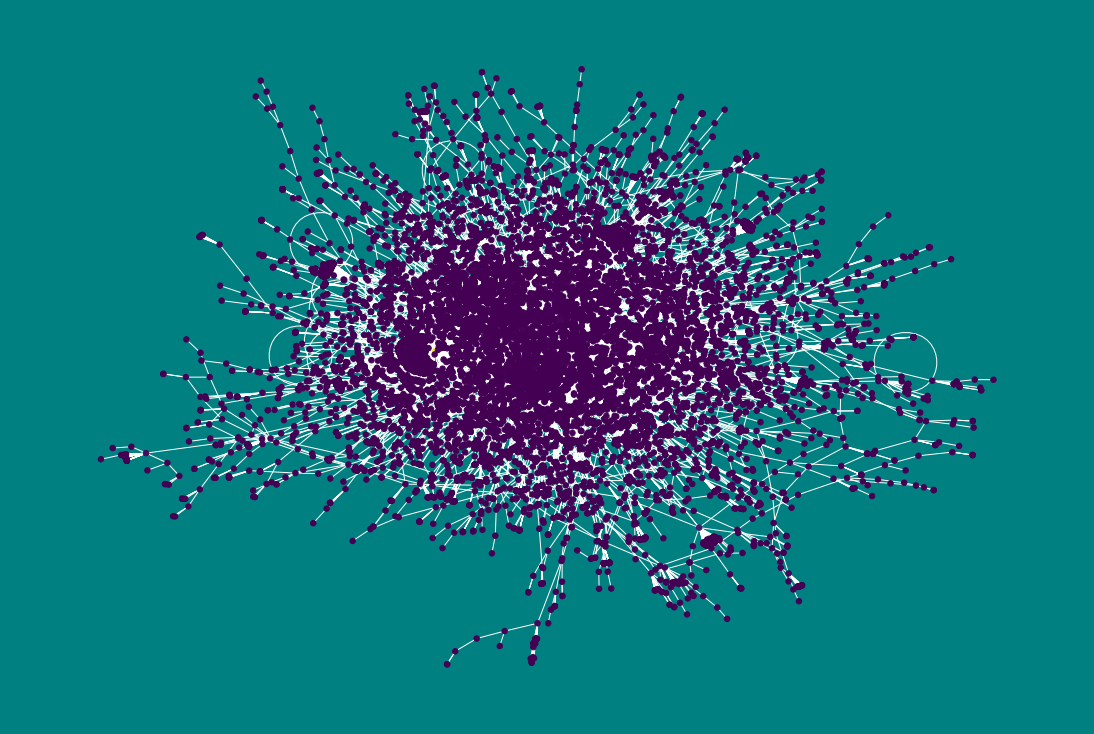

In [23]:
fig = plt.figure(figsize=(15,10))
centrality = nx.degree_centrality(g_sub)
colors = list(centrality.values())

nx.draw(g_sub,
        node_size=30,
        node_color = colors,
        edge_color="white")
fig.set_facecolor('Teal')

<br>

## 4) Record a short summary video